### Instructor Demo: Diversification

This program reads in the CSV datasets of several stocks and calculates a correlation table and heatmap to determine the semiconductor stock that is least correlated to `JNJ` and `HD`.

In [64]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSV in as DataFrame

In [65]:
# Set file paths
hd_data = Path("../Resources/HD.csv")
jnj_data = Path("../Resources/JNJ.csv")
intc_data = Path("../Resources/INTC.csv")
amd_data = Path("../Resources/AMD.csv")
mu_data = Path("../Resources/MU.csv")
nvda_data = Path("../Resources/NVDA.csv")
tsm_data = Path("../Resources/TSM.csv")

# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date")
jnj = pd.read_csv(jnj_data, index_col="date")
intc = pd.read_csv(intc_data, index_col="date")
amd = pd.read_csv(amd_data, index_col="date")
mu = pd.read_csv(mu_data, index_col="date")
nvda = pd.read_csv(nvda_data, index_col="date")
tsm = pd.read_csv(tsm_data, index_col="date")

intc.head()

,INTC
date,
5/14/19,45.17
5/13/19,44.76
5/10/19,46.20
5/9/19,46.62
5/8/19,49.24


### Combine the DataFrames

In [66]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combine_df =pd.concat([hd, jnj, intc, amd, mu, nvda, tsm], axis="columns", join = "inner")

### Calculate Daily Returns

In [67]:
# Use the `pct_change` function to calculate daily returns for each stock
daily = combine_df.pct_change

daily

<bound method NDFrame.pct_change of              HD      JNJ   INTC    AMD     MU    NVDA      TSM
date                                                          
5/14/19  191.62  66.9700  45.17  27.32  38.51  162.04  41.9700
5/13/19  190.34  66.4900  44.76  26.24  37.38  158.45  40.9900
5/10/19  194.58  67.2200  46.20  27.96  38.94  168.82  42.8300
5/9/19   194.58  66.0400  46.62  27.21  39.27  170.19  43.2500
5/8/19   195.17  66.0200  49.24  27.09  39.75  173.92  43.7000
...         ...      ...    ...    ...    ...     ...      ...
5/20/09   23.83  12.3299  15.58   4.50   4.80    9.73  10.4677
5/19/09   24.63  12.3875  15.65   4.39   4.85    9.45  10.5871
5/18/09   26.02  12.1925  15.52   4.14   4.68    9.27  10.4975
5/15/09   24.40  11.7316  15.19   4.01   4.24    8.74   9.9701
5/14/09   24.53  11.9665  15.54   4.24   4.55    8.52  10.2488

[2517 rows x 7 columns]>

### Calculate Correlation

In [68]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = combine_df.corr()

### Plot Correlation

<AxesSubplot:>

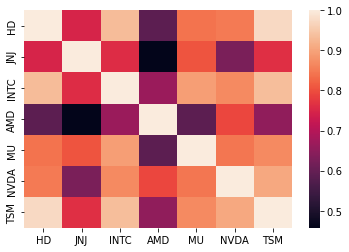

In [69]:
# Create a heatmap from the correlation.
sns.heatmap(correlation)

AttributeError: 'QuadMesh' object has no property 'max'

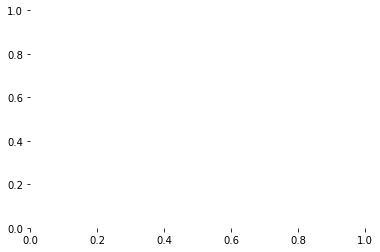

In [70]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, max = 1 ,min = 0)

### Which semiconductor stock would be the best candidate to add to the existing portfolio?